# Traffic Light Classifier
---

In this project, you’ll use your knowledge of convolutional neural networks to build a classifier for images of traffic lights! You'll be given a dataset of traffic light images in which one of three lights is illuminated: red, yellow, or green.

In this notebook, you'll pre-process these images, build a cnn model, and use your model to classify the traffic light images into three classes: red, yellow, or green. The tasks will be broken down into a few sections:

1. **Loading and visualizing the data**. 
      The first step in any classification task is to be familiar with your data; you'll need to load in the images of traffic lights and visualize them!

2. **Pre-processing**. 
    The input images and output labels need to be standardized. This way, you can analyze all the input images using the same classification pipeline, and you know what output to expect when you eventually classify a *new* image.
    The dataset will be splitted into training and test dataset for model training. The dataset can be augmented for better training which is optional in this project.
    
3. **Build your model using CNN**. 
    Next, you'll build a CNN model to predict the image class.
   
4. **Classification and visualizing error**. 
    Finally, you'll write one function that uses your model to classify *any* traffic light image. This function will take in an image and output a label. You'll also be given code to determine the accuracy of your classification model.    
    
5. **Evaluate your model**.
    To pass this project, your classifier must be >90% accurate and never classify any red lights as green; it's likely that you'll need to improve the accuracy of your classifier by changing existing features or adding new features. I'd also encourage you to try to get as close to 100% accuracy as possible!
    
Here are some sample images from the dataset (from left to right: red, green, and yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


---
### *Here's what you need to know to complete the project:*

Some template code has already been provided for you, but you'll need to implement additional code steps to successfully complete this project. Any code that is required to pass this project is marked with **'(IMPLEMENTATION)'** in the header. There are also a couple of questions about your thoughts as you work through this project, which are marked with **'(QUESTION)'** in the header. Make sure to answer all questions and to check your work against the project rubric to make sure you complete the necessary classification steps!

Your project submission will be evaluated based on the code implementations you provide, and on two main classification criteria.
Your complete traffic light classifier should have:
1. **Greater than 90% accuracy**
2. ***Never* classify red lights as green**


# 1. Loading and Visualizing the Traffic Light Dataset

This traffic light dataset consists of 1484 number of color images in 3 categories - red, yellow, and green. As with most human-sourced data, the data is not evenly distributed among the types. There are:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

*Note: All images come from this [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).*

### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

## Training and Testing Data

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images, for you to use as you create a classifier.
* 20% are test images, which will be used to test the accuracy of your classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## Define the image directories

First, we set some variables to keep track of some where our images are stored:

    IMAGE_DIR_TRAINING: the directory where our training image data is stored
    IMAGE_DIR_TEST: the directory where our test image data is stored

In [2]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

## Load the datasets

These first few lines of code will load the training traffic light images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("red", "yellow", "green"). 

You are encouraged to take a look at the `load_dataset` function in the helpers.py file. This will give you a good idea about how lots of image files can be read in from a directory using the [glob library](https://pymotw.com/2/glob/). The `load_dataset` function takes in the name of an image directory and returns a list of images and their associated labels. 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)


## Visualize the Data

The first steps in analyzing any dataset are to 1. load the data and 2. look at the data. Seeing what it looks like will give you an idea of what to look for in the images, what kind of noise or inconsistencies you have to deal with, and so on. This will help you understand the image dataset, and **understanding a dataset is part of making predictions about the data**.

---
### Visualize the input images

Visualize and explore the image data! Write code to display an image in `IMAGE_LIST`:
* Display the image
* Print out the shape of the image 
* Print out its corresponding label

See if you can display at least one of each type of traffic light image – red, green, and yellow — and look at their similarities and differences.

In [4]:
# Print the number of data
print("There are {} images in all.".format(len(IMAGE_LIST)))

There are 1187 images in all.


The shape of the selected image: (69, 32, 3).
The label of the selected image: yellow.


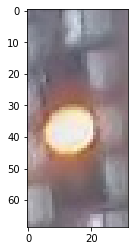

In [5]:
## DONE: Write code to display an image in IMAGE_LIST (try finding a yellow traffic light!)
selected_image = IMAGE_LIST[750][0]
plt.imshow(selected_image)

## DONE: Print out 1. The shape of the image and 2. The image's label
print("The shape of the selected image: {}.".format(selected_image.shape))
print("The label of the selected image: {}.".format(IMAGE_LIST[750][1]))

# 2. Pre-process the Data

After loading in each image, you have to standardize the input and output!

### Input

This means that every input image should be in the same format, of the same size, and so on. We'll be creating features by performing the same analysis on every picture, and for a classification task like this, it's important that **similar images create similar features**! 

### Output

We also need the output to be a label that is easy to read and easy to compare with other labels. It is good practice to convert categorical data like "red" and "green" to numerical data.

A very common classification output is a 1D list that is the length of the number of classes - three in the case of red, yellow, and green lights - with the values 0 or 1 indicating which class a certain image is. For example, since we have three classes (red, yellow, and green), we can make a list with the order: [red value, yellow value, green value]. In general, order does not matter, we choose the order [red value, yellow value, green value] in this case to reflect the position of each light in descending vertical order.

A red light should have the  label: [1, 0, 0]. Yellow should be: [0, 1, 0]. Green should be: [0, 0, 1]. These labels are called **one-hot encoded labels**.

*(Note: one-hot encoding will be especially important when you work with [machine learning algorithms](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)).*

<img src="images/processing_steps.png" width="80%" height="80%">


---
<a id='task2'></a>
### (IMPLEMENTATION): Standardize the input images

* Resize each image to the desired input size: 32x32px.
* (Optional) You may choose to crop, shift, or rotate the images in this step as well.

It's very common to have square input sizes that can be rotated (and remain the same size), and analyzed in smaller, square patches. It's also important to make all your images the same size so that they can be sent through the same pipeline of classification steps!

The shape of the standardized image: (32, 32, 3).


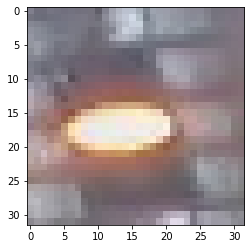

In [6]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## DONE: Resize image and pre-process so that all "standard" images are the same size  
    standard_im = np.copy(image)
    standard_im = cv2.resize(standard_im, (32, 32))
    
    return standard_im

# test
standardized_image = standardize_input(selected_image)
print("The shape of the standardized image: {}.".format(standardized_image.shape))
plt.imshow(standardized_image)

## Standardize the output

With each loaded image, we also specify the expected output. For this, we use **one-hot encoding**.

* One-hot encode the labels. To do this, create an array of zeros representing each class of traffic light (red, yellow, green), and set the index of the expected class number to 1. 

Since we have three classes (red, yellow, and green), we have imposed an order of: [red value, yellow value, green value]. To one-hot encode, say, a yellow light, we would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].


---
<a id='task3'></a>
### (IMPLEMENTATION): Implement one-hot encoding

In [7]:
## DONE: One hot encode an image label
## Given a label - "red", "green", or "yellow" - return a one-hot encoded label

# Examples: 
# one_hot_encode("red") should return: [1, 0, 0]
# one_hot_encode("yellow") should return: [0, 1, 0]
# one_hot_encode("green") should return: [0, 0, 1]

def one_hot_encode(label):
    
    ## DONE: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [0, 0, 0]
    if label == "red":
        one_hot_encoded[0] = 1
    elif label == "yellow":
        one_hot_encoded[1] = 1
    else:
        one_hot_encoded[2] = 1
    
    return one_hot_encoded

# test
print(one_hot_encode("red"))
print(one_hot_encode("yellow"))
print(one_hot_encode("green"))

[1, 0, 0]
[0, 1, 0]
[0, 0, 1]


### Testing as you Code

After programming a function like this, it's a good idea to test it, and see if it produces the expected output. **In general, it's good practice to test code in small, functional pieces, after you write it**. This way, you can make sure that your code is correct as you continue to build a classifier, and you can identify any errors early on so that they don't compound.

All test code can be found in the file `test_functions.py`. You are encouraged to look through that code and add your own testing code if you find it useful!

One test function you'll find is: `test_one_hot(self, one_hot_function)` which takes in one argument, a one_hot_encode function, and tests its functionality. If your one_hot_label code does not work as expected, this test will print ot an error message that will tell you a bit about why your code failed. Once your code works, this should print out TEST PASSED.

In [1]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(one_hot_encode)


NameError: name 'one_hot_encode' is not defined

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [9]:
def label2index(label):
    index = 0
    if label == "red":
        index = 0
    elif label == "yellow":
        index = 1
    else:
        index = 2
    
    return index

def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        # one_hot_label = one_hot_encode(label)
        
        # index label
        index_label = label2index(label)

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, index_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

The label of the standardized image: 0.


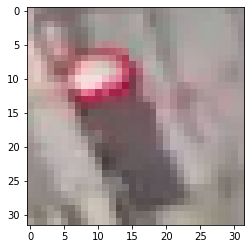

In [10]:
## Done: Display a standardized image and its label
standardized_img = STANDARDIZED_LIST[500][0]
plt.imshow(standardized_img)
print("The label of the standardized image: {}.".format(STANDARDIZED_LIST[500][1]))

## Preprocess the dataset 

### Split the dataset

Use the function `train_test_split()` in sklearn to split the dataset into training data and test data.

In [11]:
red_samples, red_labels = [], []
yellow_samples, yellow_labels = [], []
green_samples, green_labels = [], []

for item in STANDARDIZED_LIST:
    image = item[0]
    label = item[1]
    
    if label == 0:
        red_samples.append(image)
        red_labels.append(label)
    elif label == 1:
        yellow_samples.append(image)
        yellow_labels.append(label)
    else:
        green_samples.append(image)
        green_labels.append(label)
    

In [12]:
from sklearn.model_selection import train_test_split

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(
    red_samples,
    red_labels,
    test_size=0.05,
    random_state=42
)

X_yellow_train, X_yellow_test, y_yellow_train, y_yellow_test = train_test_split(
    yellow_samples,
    yellow_labels,
    test_size=0.05,
    random_state=42
)

X_green_train, X_green_test, y_green_train, y_green_test = train_test_split(
    green_samples,
    green_labels,
    test_size=0.05,
    random_state=42
)

X_train = np.concatenate([X_red_train, X_yellow_train, X_green_train], axis=0)
y_train = np.concatenate([y_red_train, y_yellow_train, y_green_train], axis=0)

X_test = np.concatenate([X_red_test, X_yellow_test, X_green_test], axis=0)
y_test = np.concatenate([y_red_test, y_yellow_test, y_green_test], axis=0)

### Parameters of the training and test data

In [13]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of a standardized image?
image_shape = X_train.shape[1:3]

# DONE: How many unique classes/labels there are in the dataset.
n_classes = 3

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

train_memory_amount = n_train * (image_shape[0] * image_shape[1] * 3 + n_classes) / 1024 / 1024
test_memory_amount = n_test * (image_shape[0] * image_shape[1] * 3 + n_classes) / 1024 / 1024
all_memory_amount = train_memory_amount + test_memory_amount
print("Train memory amount (Mb) =", train_memory_amount)
print("Test memory amount (Mb) =", test_memory_amount)
print("All memory amount (Mb) =", all_memory_amount)

Number of training examples = 1126
Number of testing examples = 61
Image data shape = (32, 32)
Number of classes = 3
Train memory amount (Mb) = 3.3020496368408203
Test memory amount (Mb) = 0.17888545989990234
All memory amount (Mb) = 3.4809350967407227


### Data exploration visualization goes here.

Feel free to use as many code cells as needed.

In [14]:
print(X_train.shape)
print(X_test.shape)

(1126, 32, 32, 3)
(61, 32, 32, 3)


In [15]:
print(X_train[0].shape)

(32, 32, 3)


In [16]:
train_classes_sizes = [np.count_nonzero(y_train==i) for i in range(n_classes)] 
test_classes_sizes = [np.count_nonzero(y_test==i) for i in range(n_classes)]

print(train_classes_sizes)
print(test_classes_sizes)

[686, 33, 407]
[37, 2, 22]


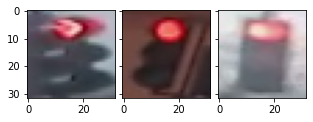

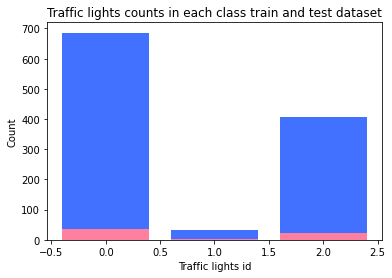

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid

def show_images_in_grid(images, rows, cols):
    fig = plt.figure (figsize=(5., 10.))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(rows, cols),
                     axes_pad=0.1
                     )
    for i in range(len(images)):
        grid[i].imshow(images [i])

    plt.show()

# table of image examples for diffetent classes
im_pos = 0
X_train_examples = []
# num_of_examples = 10
for i in range(n_classes):
    X_train_examples.append(X_train[im_pos])
    im_pos += 100

show_images_in_grid(X_train_examples, 1, n_classes)

#counts of examples in each classes
plt.figure()
plt_x = range(n_classes)
train_classes_sizes = [np.count_nonzero(y_train==i) for i in range (n_classes)] 
test_classes_sizes = [np.count_nonzero(y_test==i) for i in range (n_classes)] 
plt.bar(plt_x, train_classes_sizes, color=(0.2588,0.4433,1.0))
plt.bar(plt_x, test_classes_sizes, color=(1.0,0.5,0.62))
plt.xlabel('Traffic lights id')
plt.ylabel('Count')
plt.title('Traffic lights counts in each class train and test dataset')
plt.show()

### Preprocess the data here.

Feel free to use as many code cells as needed.

In [18]:
# rescaling of pixel magnitudes
X_train_preprocessed = np.divide(X_train, 255).astype (np.float32);
X_test_preprocessed = np.divide(X_test, 255).astype (np.float32);

# dividing into train and validation dataset

def shuffle_dataset (dataset_x, dataset_y):
    assert len (dataset_x) == len (dataset_y)
    p = np.random.permutation(len(dataset_x))
    return dataset_x [p], dataset_y [p]

def split_into_train_and_validation_dataset (dataset_x, dataset_y, train_proportion):
    train_samples_by_classes = []
    train_labels_by_classes = []
    X_train_samples = np.zeros ((0, image_shape[0], image_shape[1], 3))
    y_train_samples = np.zeros ((0,))
    X_validation_samples = np.zeros ((0, image_shape[0], image_shape[1], 3))
    y_validation_samples = np.zeros ((0,))
    sample_index = 0
    for class_size in train_classes_sizes:
        train_samples_count = int(train_proportion * class_size)

        #getting and shuffle one class samples
        dataset_x_for_class = dataset_x[sample_index:sample_index + class_size]
        dataset_y_for_class = dataset_y[sample_index:sample_index + class_size]
        dataset_x_for_class, dataset_y_for_class = shuffle_dataset (dataset_x_for_class, dataset_y_for_class)
        
        #splitting to train and validation dataset
        X_train_for_class = dataset_x_for_class[0:train_samples_count]
        y_train_for_class = dataset_y_for_class[0:train_samples_count]
        X_valid_for_class = dataset_x_for_class[train_samples_count:class_size]
        y_valid_for_class = dataset_y_for_class[train_samples_count:class_size]
        
        #storing train samples by classes
        #this will be used later to generate augmented dataset
        train_samples_by_classes.append(X_train_for_class)
        train_labels_by_classes.append(y_train_for_class)
        
        #storing samples in corresponding datasets
        X_train_samples = np.concatenate((X_train_samples, X_train_for_class), axis=0)
        y_train_samples = np.concatenate((y_train_samples, y_train_for_class), axis=0)
        X_validation_samples = np.concatenate((X_validation_samples, X_valid_for_class), axis=0)
        y_validation_samples = np.concatenate((y_validation_samples, y_valid_for_class), axis=0)
        
        sample_index += class_size
        
    return X_train_samples, y_train_samples, X_validation_samples, y_validation_samples, train_samples_by_classes, train_labels_by_classes

X_train_for_learning, \
y_train_for_learning, \
X_valid_for_learning, \
y_valid_for_learning, \
samples_by_classes, \
labels_by_classes = split_into_train_and_validation_dataset (X_train_preprocessed, y_train, 0.8)

### Generate data additional data (OPTIONAL!) and split the data into training/validation/testing sets here.

Feel free to use as many code cells as needed.

In [19]:
import random as rand

# generate @generate_count images from given @images
def augment_images (images, generate_count):
    images_last_index = len (images) - 1
    augmented = []
    for i in range (generate_count):
        im1 = images [rand.randint (0, images_last_index)]
        
        #rotation and scaling
        Mrot = cv2.getRotationMatrix2D((16,16),rand.uniform(-5.0, 5.0), rand.uniform(0.95, 1.05))

        #affine transform and shifts
        pts1 = np.float32([[0,0],[image_shape[1],0],[image_shape[1], image_shape[0]]])
        a = 5;
        shift = 8
        shiftx = rand.randint (-shift, shift);
        shifty = rand.randint (-shift, shift);
        pts2 = np.float32([[
                    0 + rand.randint (-a, a) + shiftx,
                    0 + rand.randint (-a, a) + shifty
                ],[
                    image_shape[1] + rand.randint (-a, a) + shiftx,
                    0 + rand.randint (-a, a) + shifty
                ],[
                    image_shape[1] + rand.randint (-a, a) + shiftx,
                    image_shape[0] + rand.randint (-a, a) + shifty
                ]])
        M = cv2.getAffineTransform(pts1,pts2)
        (h, w) = im1.shape[:2]

        augmented_image = cv2.warpAffine(
            cv2.warpAffine (
                im1
                , Mrot, (w, h)
            )
            , M, (w,h)
        )
        
        augmented_image += rand.uniform(-0.2, 0.2)
        np.clip(augmented_image, 0.0, 1.0, out=augmented_image)
        
        augmented.append (augmented_image)
        
    return augmented

### Augment the data

In [20]:
# augmented dataset will be stored in this global variables
X_train_augmented = np.zeros ((0, image_shape[0], image_shape[1], 3))
y_train_augmented = np.zeros ((0,))

#generate images up to 3000 images for each class
#augmented dataset will contain only generated images
augment_limit = 3000
def augment_dataset ():
    global X_train_augmented
    global y_train_augmented
    X_train_augmented = np.zeros ((0, image_shape[0], image_shape[1], 3))
    y_train_augmented = np.zeros ((0,))
    
    for augmenting_index in range(n_classes):
        samples = samples_by_classes [augmenting_index]
        labels = labels_by_classes [augmenting_index]

        augment_count = augment_limit
        new_samples = augment_images (samples, augment_count)
        y_train_augmented = np.concatenate((y_train_augmented, [augmenting_index for i in range (augment_count)]), axis=0)

        X_train_augmented = np.concatenate((X_train_augmented, new_samples), axis=0)

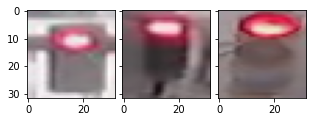

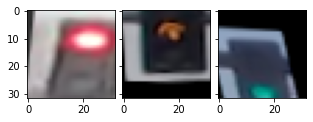

In [21]:
# showing examples of augmented dataset
show_images_in_grid ([X_train_for_learning [i] for i in range(3)], 1, 3)
augment_dataset ()
show_images_in_grid ([X_train_augmented [i] for i in range(0, n_classes * augment_limit, augment_limit)], 1, 3)

# 3. Building your CNN Model

### Define your architecture here.

Feel free to use as many code cells as needed.


In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(16, (5, 5), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          2

### Compile and train the Model

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_augmented, y_train_augmented, epochs=10, 
                    validation_data=(X_valid_for_learning, y_valid_for_learning))

Epoch 1/10
282/282 [==============================] - 7s 25ms/step - loss: 0.1953 - accuracy: 0.9306 - val_loss: 0.0841 - val_accuracy: 0.9648
Epoch 2/10
282/282 [==============================] - 7s 24ms/step - loss: 0.0404 - accuracy: 0.9848 - val_loss: 0.0086 - val_accuracy: 0.9956
Epoch 3/10
282/282 [==============================] - 7s 24ms/step - loss: 0.0230 - accuracy: 0.9908 - val_loss: 1.0079e-04 - val_accuracy: 1.0000
Epoch 4/10
282/282 [==============================] - 7s 24ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/10
282/282 [==============================] - 7s 24ms/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.0092 - val_accuracy: 0.9956
Epoch 6/10
282/282 [==============================] - 7s 24ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0139 - val_accuracy: 0.9956
Epoch 7/10
282/282 [==============================] - 7s 24ms/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.0012 - val_accuracy: 1.

### Evaluate the model

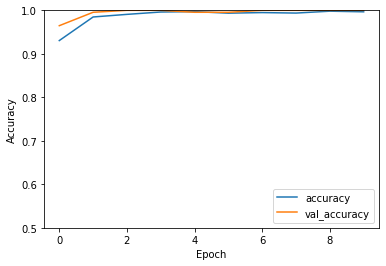

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# 4. Classification and Visualizing Error

Using all of your features, write a function that takes in an RGB image and, using your extracted features, outputs whether a light is red, green or yellow as a one-hot encoded label. This classification function should be able to classify any image of a traffic light!

You are encouraged to write any helper functions or visualization code that you may need, but for testing the accuracy, make sure that this `estimate_label` function returns a one-hot encoded label.

---
<a id='task8'></a>
### (IMPLEMENTATION): Build a complete classifier 

0


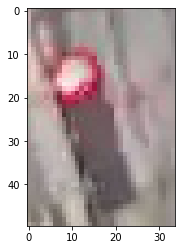

In [34]:
# This function should take in RGB image input
# Analyze that image using your feature creation code and output a one-hot encoded label
def estimate_label(rgb_image):

    # Preprocess imgae imput
    dst = cv2.resize(rgb_image, (32, 32), interpolation=cv2.INTER_CUBIC)

    picture = dst.reshape(1, 32, 32, 3)
    
    picture = np.array(picture, dtype=np.float64)

    # print(result_index)
    
    predicted_label = model.predict(picture)
    
    score = tf.nn.softmax(predicted_label[0])
    
    return np.argmax(score)   

# test
test_image = IMAGE_LIST[500][0]
plt.imshow(test_image)

print(estimate_label(test_image))

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook! This project will be complete once you've pogrammed a "good" classifier.

A "good" classifier in this case should meet the following criteria (and once it does, feel free to submit your project):
1. Get above 90% classification accuracy.
2. Never classify a red light as a green light. 

### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [35]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `MISCLASSIFIED`. This code is used for testing and *should not be changed*.

In [36]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        print("true label: {}".format(true_label))
        # assert(len(true_label) == 1), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        print("predicted label: {}".format(predicted_label))
        # assert(len(predicted_label) == 1), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


true label: 2
predicted label: 2
true label: 2
predicted label: 0
true label: 0
predicted label: 0
true label: 1
predicted label: 1
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label

predicted label: 0
true label: 2
predicted label: 2
true label: 1
predicted label: 1
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 2
predicted label: 2
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted label: 0
true label: 0
predicted 

---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

In [29]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as


---
<a id='question2'></a>
## (Question 2): After visualizing these misclassifications, what weaknesses do you think your classification algorithm has? Please note at least two.

**Answer:** Write your answer in this cell.

## Test if you classify any red lights as green

**To pass this project, you must not classify any red lights as green!** Classifying red lights as green would cause a car to drive through a red traffic light, so this red-as-green error is very dangerous in the real world. 

The code below lets you test to see if you've misclassified any red lights as green in the test set. **This test assumes that `MISCLASSIFIED` is a list of tuples with the order: [misclassified_image, predicted_label, true_label].**

Note: this is not an all encompassing test, but its a good indicator that, if you pass, you are on the right track! This iterates through your list of misclassified examples and checks to see if any red traffic lights have been mistakenly labelled [0, 1, 0] (green).

In [30]:
# Importing the tests
import test_functions
tests = test_functions.Tests()

if(len(MISCLASSIFIED) > 0):
    # Test code for one_hot_encode function
    tests.test_red_as_green(MISCLASSIFIED)
else:
    print("MISCLASSIFIED may not have been populated with images.")


**<span style="color: green;">TEST PASSED</span>**

# 5. Improve your algorithm!

**Submit your project after you have completed all implementations, answered all questions, AND when you've met the two criteria:**
1. Greater than 90% accuracy classification
2. No red lights classified as green

If you did not meet these requirements (which is common on the first attempt!), revisit your algorithm and tweak it to improve light recognition -- this could mean changing the brightness feature, performing some background subtraction, or adding another feature!

---

### Going Further (Optional Challenges)

If you found this challenge easy, I suggest you go above and beyond! Here are a couple **optional** (meaning you do not need to implement these to submit and pass the project) suggestions:
* (Optional) Aim for >95% classification accuracy.
* (Optional) Some lights are in the shape of arrows; further classify the lights as round or arrow-shaped.
* (Optional) Add another feature and aim for as close to 100% accuracy as you can get!